<a href="https://colab.research.google.com/github/hansglick/book_errata/blob/main/p013_Image_Captionning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


# Steps
 1. Télécharger les données
 2. Créer un model d'extracteurs de features basé sur Inception
 3. Cacher les features sur le disk
 4. Tokenizer les captions
 5. Création des tensorflow dataset training, test
 6. Définir les layers, encoder, decoder
 7. Définir le training step
 8. Entraînement
 9. Fonction d'inférence

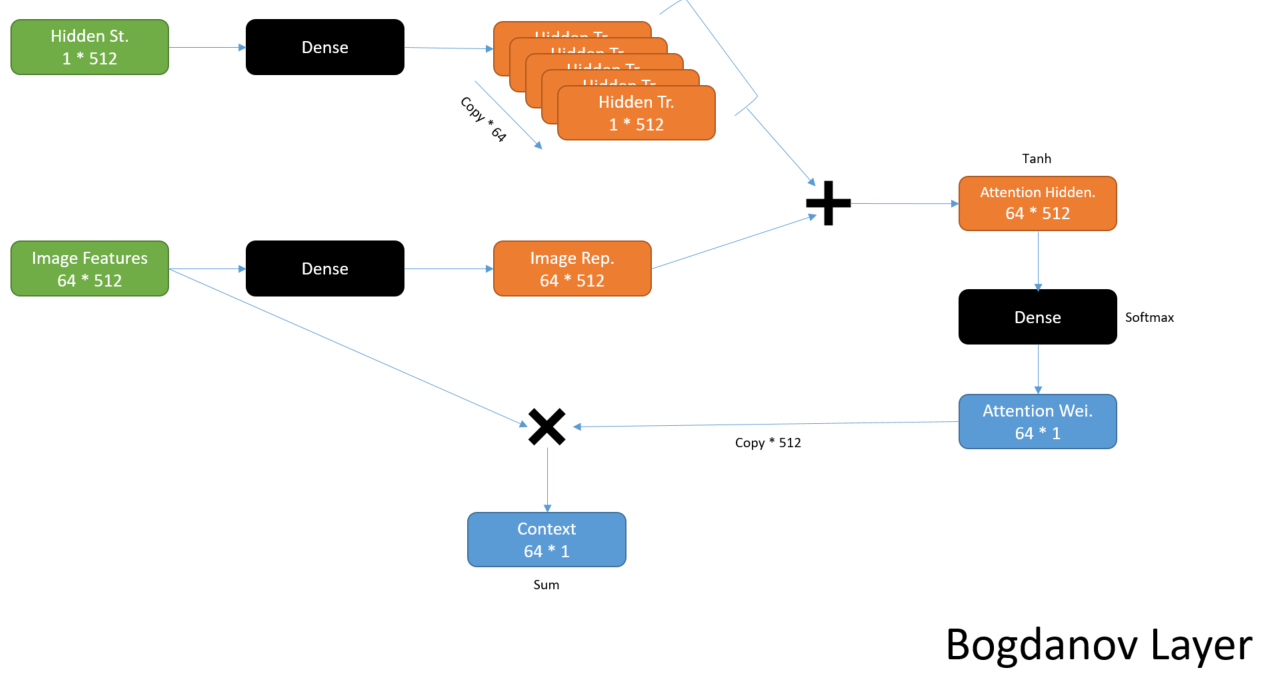

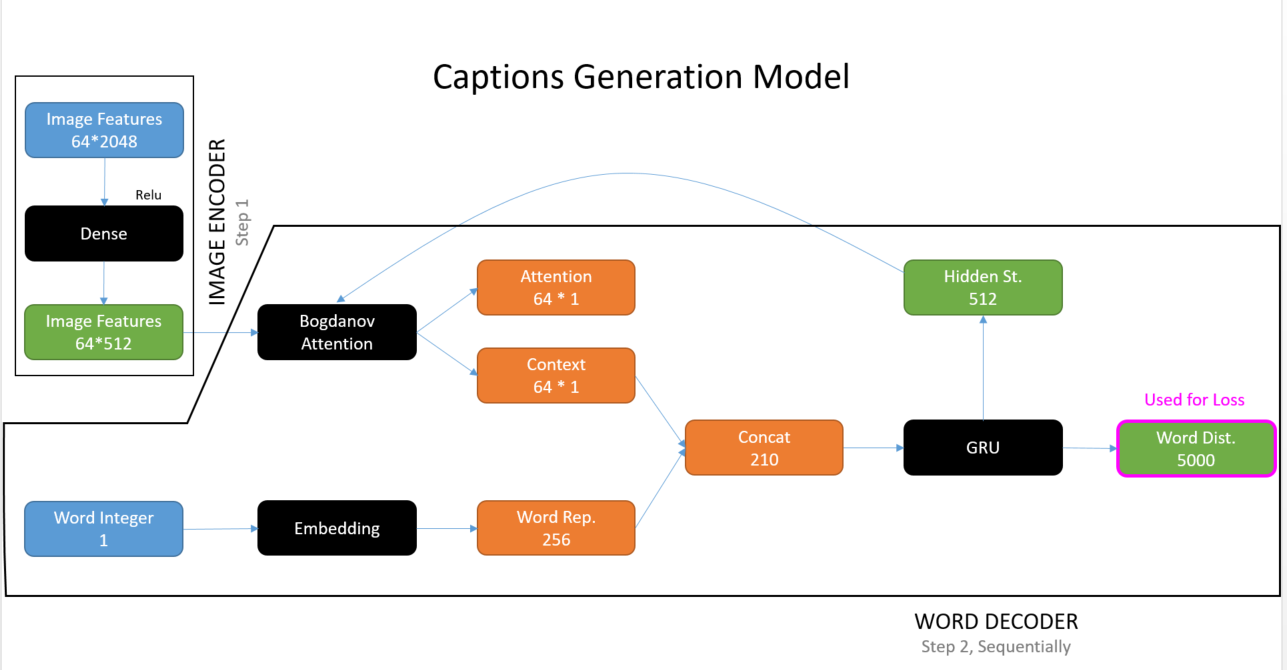

In [ ]:
# STEP 1
# Télécharger les données
# tf.keras.utils.get_file() télécharge les données du mentionné dans le path
# tf.keras.utils.get_file() retourne le chemin du fichier téléchargé
# tf.keras.utils.get_file() l'argument extract permet le dézippage
# tf.keras.utils.get_file() l'argument cache_subdir pour spécifier la location des fichiers downloaded
# url legendes : http://images.cocodataset.org/annotations/annotations_trainval2014.zip
# url images : http://images.cocodataset.org/zips/train2014.zip
# Enregistrer le zip sous les noms captions.zip, train2014.zip dans deux dossiers différents
# Pour les légendes on devrait avoir un fichier json : captions_train2014.json
# Supprimez les zip une fois téléchargés

In [ ]:
# STEP 1 - BIS
# Réduire les données
# objet['annotations']['captions'] -> legend
# objet['annotations']['image_id'] -> id de l'image
# Rajouter un <start> et <end> au début et à la fin des légendes
# Récupérez 6000 images au hasard et leur légendes

In [ ]:
# STEP -
# Transformez les images en tensors
# tf.io.read_file ... lire le fichier
# tf.io.decode_jpeg ... d'une image à un tensor
# tf.keras.layers.Resizing ... pour redimensionner un tensor (faire un 299,299)
# tf.keras.applications.inception_v3.preprocess_input ... inceptionv3 a besoin d'un format particulier
# Il faut une fonction qui renvoie path d'une image et tensor preprocessé
# load_image(image_path)

In [ ]:
# STEP - 
# Création du model d'extraction de features basé sur le pretrained inceptionv3 sur le dataset imagenet
# tf.keras.applications.InceptionV3

In [ ]:
# STEP -
# Création du dataset images
# Création d'un dataset des url des images brutes
# Utilisez la map method avec la fonction load_image() pour en faire un dataset de tensors
# Bouclez sur le dataset images afin d'extraire les features avec le model extractor de inceptionv3
# Sauvez les tensors au format numpy array à un path spécifique avec np.save()

In [ ]:
# STEP -
# Tokenization des legendes
# Créer une fonction de normalisation d'une string, lowerisation, remove punctuations
# tf.keras.layers.TextVectorization() avec argument max_tokens pr ne prendre que les 5000 mots les plus fréquents
# tf.keras.layers.TextVectorization() avec argument standardize pour renseigner la fonction de normalisation des strings
# tf.keras.layers.TextVectorization() avec argumrent output_sequence_length pour padder à 50
# Ne pas oublier d'adapter le tokenizer sur l'ensemble des légendes ca peut se faire en renseignant le dataset des légendes
# Utilisez la méthode map() pour modifier le dataset des légendes en le tokenizant
# Créez des mappers tokens to sentences et sentences to tokens
# Pour ce faire, tf.keras.layers.StringLookup avec l'argument Invert

In [ ]:
# STEP - 
# Splitting Strategies
# Construire une liste pour captions train, captions val, image train, image val

In [ ]:
# STEP -
# Creation des tensorflow datsets
# Constuire une fonction loadder map_func(img_name, cap) qui prend le nom d'une image et sa légende en text
# Créez un dataset de tuples 
# Utilisez la map method pour créer le dataset final via la fonction map_func

In [ ]:
# STEP -
# Création des composants du Model
# Se référer au schéma produits sur Power Point
# Bogdanov Layer
# Encoder
# Decoder

In [ ]:
# STEP -
# Initialisation du Check Point Manager
# Tracking de encoder, decoder, et optimizer
# Création de la cell de restauration
# Utilisez ckpt_manager.save() dans la custom loop

In [ ]:
# STEP - 
# Définition de la fonction training_step @tf.function
# Définition de la fonction Loss, qui est quelque peu particulière, elle doit prendre en compte le masking
# Création de la Custom Loop et des logs associés
# Utilisez ckpt_manager.save() dans la custom loop

In [ ]:
# STEP - 
# Création de la fonction d'inférence
# Prédire la légende
# Générer des mots jusqu'à l'obtention du token '<end>'
# Sauvegarder les attention weights
# Être capable de l'afficher sous forme d'images comme dans l'exemple